In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Read dataset

In [2]:
# Import Dataset

traffic_data = pd.read_csv("dataset/Metro_Interstate_Traffic_Volume.csv", parse_dates=['date_time'], index_col='date_time')

In [3]:
traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
# Checking for any missing or empty value
traffic_data.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

# convert categorical to nominal data

In [5]:
# Convert categorical value to numerical values. For holiday attribute, value will be within by 0 and 1. If it is holiday then 1 otherwise 0
label_encoder = preprocessing.LabelEncoder()
traffic_data['holiday'] = np.where(traffic_data.holiday=='None',0,1).astype('int64')
traffic_data['weather_main'] = label_encoder.fit_transform(traffic_data['weather_main'])
traffic_data['weather_description'] = label_encoder.fit_transform(traffic_data['weather_description'])

In [6]:
traffic_data.describe()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,0.001265,281.205870,0.334264,0.000222,49.362231,2.578375,16.540536,3259.818355
std,0.035551,13.338232,44.789133,0.008168,39.015750,2.784224,8.970108,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,272.160000,0.000000,0.000000,1.000000,0.000000,10.000000,1193.000000
50%,0.000000,282.450000,0.000000,0.000000,64.000000,1.000000,17.000000,3380.000000
75%,0.000000,291.806000,0.000000,0.000000,90.000000,5.000000,27.000000,4933.000000
max,1.000000,310.070000,9831.300000,0.510000,100.000000,10.000000,37.000000,7280.000000


<AxesSubplot:xlabel='date_time'>

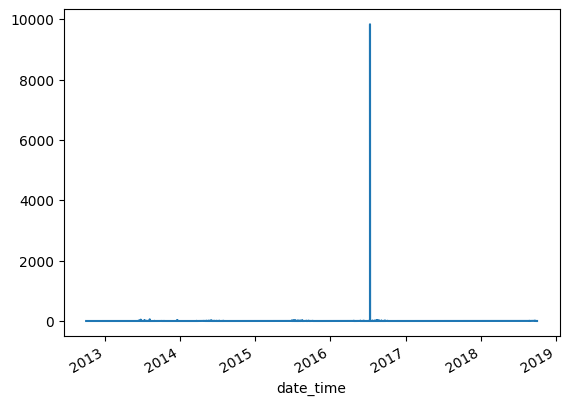

In [7]:
#traffic_data['temp'].plot()
traffic_data['rain_1h'].plot()

<AxesSubplot:xlabel='date_time'>

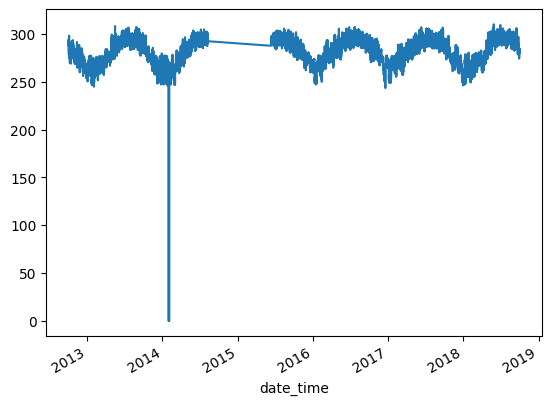

In [8]:
traffic_data['temp'].plot()

In [9]:
Q1 = traffic_data.quantile(0.25)
Q3 = traffic_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

holiday                   0.000
temp                     19.646
rain_1h                   0.000
snow_1h                   0.000
clouds_all               89.000
weather_main              5.000
weather_description      17.000
traffic_volume         3740.000
dtype: float64


In [10]:
traffic_data=traffic_data[~((traffic_data['temp'] <(Q1['temp']-1.5*IQR['temp'])) | (traffic_data['temp'] >(Q1['temp']+1.5*IQR['temp'])))]
#traffic_data=traffic_data[~((traffic_data['rain_1h'] <(Q1['rain_1h']-1.5*IQR['rain_1h'])) | (traffic_data['rain_1h'] >(Q1['rain_1h']+1.5*IQR['rain_1h'])))]

# Prepare training and testing data

<AxesSubplot:xlabel='date_time'>

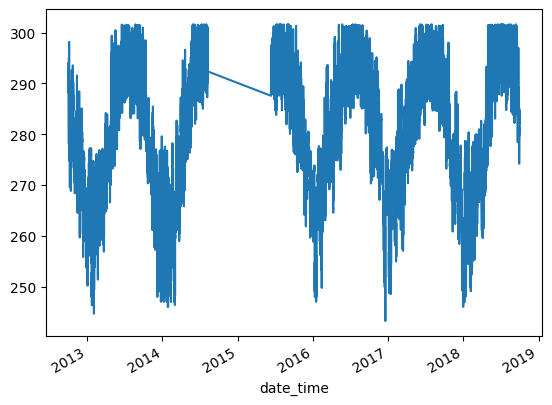

In [11]:
# ploting traffic data to see to see any data imbalance
traffic_data['temp'].plot()

<AxesSubplot:xlabel='date_time'>

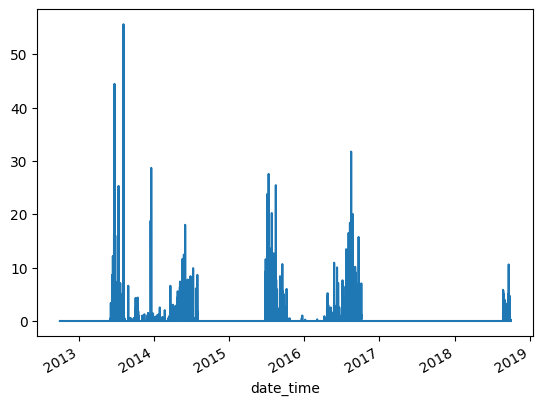

In [12]:
traffic_data['rain_1h'].plot()

In [13]:

traffic_data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,0,288.28,0.0,0.0,40,1,24,5545
2012-10-02 10:00:00,0,289.36,0.0,0.0,75,1,2,4516
2012-10-02 11:00:00,0,289.58,0.0,0.0,90,1,19,4767
2012-10-02 12:00:00,0,290.13,0.0,0.0,90,1,19,5026
2012-10-02 13:00:00,0,291.14,0.0,0.0,75,1,2,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0,283.45,0.0,0.0,75,1,2,3543
2018-09-30 20:00:00,0,282.76,0.0,0.0,90,1,19,2781
2018-09-30 21:00:00,0,282.73,0.0,0.0,90,10,21,2159


In [14]:
# Values of the attribute are in different scales. For example, holiday has maximum value 1 and traffic volume let say, 2000. Since these values are totally different range, it might be hurt model learning process. To overcome this issue, we need to do data normalization or standarization.
sc = MinMaxScaler()
data_set = sc.fit_transform(traffic_data)
data_frame = pd.DataFrame(data_set)


In [15]:
# Make data for the LSTM model. I used past t-hours of data to predict the next 'n' hours data. Here window_size means window size data will be used for predicting next 'n' hours data

def df_to_x_y(data, window_size=5):
    X = []
    y = []
    for i in range(len(data)-window_size):
        row = [r for r in data[i:i+window_size]]
        X.append(row)
        label = data[i+window_size][7]
        y.append(label)
    return np.array(X), np.array(y)

X, y = df_to_x_y(data_set,10)
X.shape, y.shape

((47274, 10, 8), (47274,))

In [16]:
# split data into train test and validation datase
from cgi import test


train_length = int(len(X)*0.8) # 80% trainging
test_length = int(len(X)*.10) # 10% testing and rest for validation
print(train_length, test_length, (train_length+test_length))
X_train, y_train = X[:train_length],y[:train_length]
X_val, y_val = X[train_length:(train_length+test_length)], y[train_length:(train_length+test_length)]
X_test, y_test = X[(train_length+test_length):], y[(train_length+test_length):]

37819 4727 42546


In [17]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)


(((37819, 10, 8), (37819,)),
 ((4728, 10, 8), (4728,)),
 ((4727, 10, 8), (4727,)))

In [18]:
#define model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((10,8)))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10))
model.add(Dense(10,'relu'))
model.add(Dense(1,'linear'))


Metal device set to: Apple M1


2022-11-08 11:22:09.409313: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-08 11:22:09.409408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, callbacks=[cp], batch_size=16, verbose=1)

Epoch 1/200
2364/2364 [==============================] - ETA: 0s - loss: 0.0077

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 53s 22ms/step - loss: 0.0077 - val_loss: 0.0047
Epoch 2/200
2364/2364 [==============================] - 41s 17ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 3/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0076

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 50s 21ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 4/200
2364/2364 [==============================] - 39s 17ms/step - loss: 0.0076 - val_loss: 0.0047
Epoch 5/200
2362/2364 [============================>.] - ETA: 0s - loss: 0.0076

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 51s 22ms/step - loss: 0.0076 - val_loss: 0.0046
Epoch 6/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0075

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 7/200
2364/2364 [==============================] - 38s 16ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 8/200
2364/2364 [==============================] - 40s 17ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 9/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0074

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 10/200
2364/2364 [==============================] - 38s 16ms/step - loss: 0.0074 - val_loss: 0.0048
Epoch 11/200
2364/2364 [==============================] - ETA: 0s - loss: 0.0074

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 50s 21ms/step - loss: 0.0074 - val_loss: 0.0045
Epoch 12/200
2364/2364 [==============================] - 38s 16ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 13/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0073

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 47s 20ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 14/200
2362/2364 [============================>.] - ETA: 0s - loss: 0.0073

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 50s 21ms/step - loss: 0.0073 - val_loss: 0.0044
Epoch 15/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0072

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 16/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0072

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 47s 20ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 17/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0072

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 50s 21ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 18/200
2364/2364 [==============================] - 38s 16ms/step - loss: 0.0072 - val_loss: 0.0043
Epoch 19/200
2362/2364 [============================>.] - ETA: 0s - loss: 0.0071

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 20/200
2364/2364 [==============================] - ETA: 0s - loss: 0.0071

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 21ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 21/200
2364/2364 [==============================] - 41s 17ms/step - loss: 0.0071 - val_loss: 0.0042
Epoch 22/200
2364/2364 [==============================] - 39s 17ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 23/200
2364/2364 [==============================] - 39s 16ms/step - loss: 0.0070 - val_loss: 0.0043
Epoch 24/200
2364/2364 [==============================] - 39s 16ms/step - loss: 0.0070 - val_loss: 0.0042
Epoch 25/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0070

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 51s 22ms/step - loss: 0.0070 - val_loss: 0.0041
Epoch 26/200
2364/2364 [==============================] - 39s 16ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 27/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0069

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 49s 21ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 28/200
2364/2364 [==============================] - 40s 17ms/step - loss: 0.0069 - val_loss: 0.0042
Epoch 29/200
2362/2364 [============================>.] - ETA: 0s - loss: 0.0069

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0069 - val_loss: 0.0040
Epoch 30/200
2364/2364 [==============================] - 39s 16ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 31/200
2362/2364 [============================>.] - ETA: 0s - loss: 0.0068

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 49s 21ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 32/200
2364/2364 [==============================] - ETA: 0s - loss: 0.0068

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 51s 21ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 33/200
2364/2364 [==============================] - 38s 16ms/step - loss: 0.0068 - val_loss: 0.0041
Epoch 34/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0068

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 48s 20ms/step - loss: 0.0068 - val_loss: 0.0040
Epoch 35/200
2364/2364 [==============================] - 41s 17ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 36/200
2364/2364 [==============================] - 40s 17ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 37/200
2364/2364 [==============================] - 39s 17ms/step - loss: 0.0067 - val_loss: 0.0040
Epoch 38/200
2364/2364 [==============================] - 39s 17ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 39/200
2364/2364 [==============================] - 42s 18ms/step - loss: 0.0066 - val_loss: 0.0040
Epoch 40/200
2364/2364 [==============================] - 40s 17ms/step - loss: 0.0066 - val_loss: 0.0041
Epoch 41/200
2363/2364 [============================>.] - ETA: 0s - loss: 0.0066

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


2364/2364 [==============================] - 51s 22ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 42/200
2364/2364 [==============================] - 39s 16ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 43/200
2364/2364 [==============================] - 41s 18ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 44/200
 618/2364 [======>.......................] - ETA: 27s - loss: 0.0064

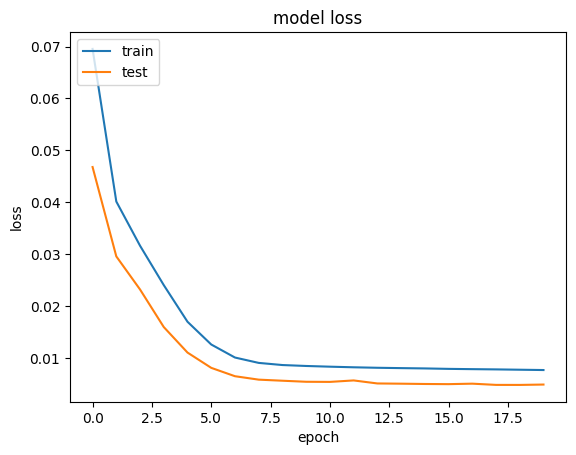

In [21]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from tensorflow.keras.models import load_model
m = load_model('model/')

In [23]:
pre = m.predict(X_test)

2022-11-08 12:07:35.186656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 12:07:35.318957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 12:07:35.373282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 16/148 [==>...........................] - ETA: 0s

2022-11-08 12:07:35.410433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


148/148 [==============================] - 2s 7ms/step


In [24]:
from tabnanny import verbose


eva = m.evaluate(X_test, y_test, verbose=0)

2022-11-08 12:07:36.896388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 12:07:36.997738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 12:07:37.031939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-08 12:07:37.066909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [25]:
eva

0.005138293839991093

In [26]:
Y = np.repeat(pre, 8, axis=1)
TT = sc.inverse_transform(Y)
TT 

array([[2.5236848e-01, 2.5808542e+02, 1.4039259e+01, ..., 2.5236847e+00,
        9.3376341e+00, 1.8372426e+03],
       [2.4929830e-01, 2.5790665e+02, 1.3868464e+01, ..., 2.4929831e+00,
        9.2240372e+00, 1.8148916e+03],
       [1.6333273e-01, 2.5290085e+02, 9.0861998e+00, ..., 1.6333272e+00,
        6.0433111e+00, 1.1890623e+03],
       ...,
       [3.0945271e-01, 2.6140942e+02, 1.7214855e+01, ..., 3.0945272e+00,
        1.1449750e+01, 2.2528157e+03],
       [2.0690708e-01, 2.5543819e+02, 1.1510241e+01, ..., 2.0690708e+00,
        7.6555619e+00, 1.5062836e+03],
       [1.3528055e-01, 2.5126740e+02, 7.5256572e+00, ..., 1.3528055e+00,
        5.0053802e+00, 9.8484241e+02]], dtype=float32)

In [27]:
Y_test = np.repeat(y_test, 8)
Y_test = Y_test.reshape(-1,8)
Y_TT = sc.inverse_transform(Y_test)
Y_TT

array([[2.96428571e-01, 2.60651036e+02, 1.64903214e+01, ...,
        2.96428571e+00, 1.09678571e+01, 2.15800000e+03],
       [2.43543956e-01, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       [2.43543956e-01, 2.57571565e+02, 1.35483503e+01, ...,
        2.43543956e+00, 9.01112637e+00, 1.77300000e+03],
       ...,
       [2.96565934e-01, 2.60659034e+02, 1.64979629e+01, ...,
        2.96565934e+00, 1.09729396e+01, 2.15900000e+03],
       [1.99175824e-01, 2.54988008e+02, 1.10801511e+01, ...,
        1.99175824e+00, 7.36950549e+00, 1.45000000e+03],
       [1.31043956e-01, 2.51020690e+02, 7.28997527e+00, ...,
        1.31043956e+00, 4.84862637e+00, 9.54000000e+02]])

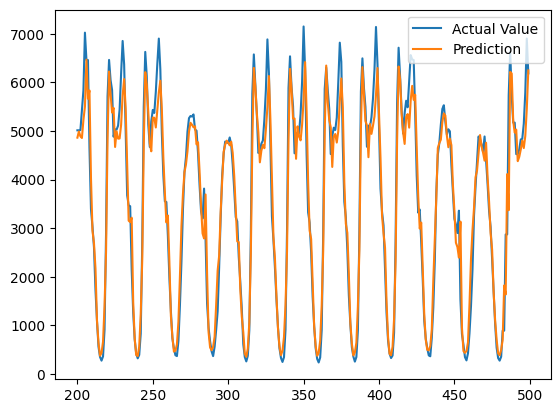

In [28]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:500], Y_test[200:500])
plt.plot(X[200:500], Y_pred[200:500])
plt.legend(['Actual Value','Prediction'])
plt.show()

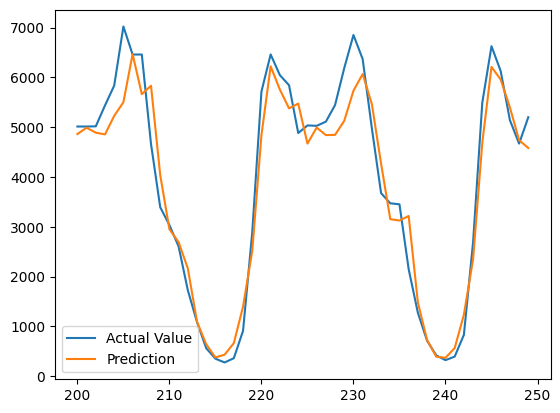

In [29]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:250], Y_test[200:250])
plt.plot(X[200:250], Y_pred[200:250])
plt.legend(['Actual Value','Prediction'])
plt.show()